In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import itertools

In [6]:
Dataframe1 = pd.read_csv('D:\mergedataset.csv')
X = Dataframe1.iloc[:,1:7]
Y = Dataframe1.iloc[:,7]

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)


(42254, 6)


In [8]:
clf = RandomForestClassifier()
rf=clf.fit(X_train,y_train) 

y_pred =rf.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(rf,X_test,y_test).mean())

ground truth           : 3041     5
954      5
41303    0
13837    4
29007    2
        ..
16641    3
5734     5
23448    2
30772    1
16086    3
Name: Label, Length: 12677, dtype: int64
predicted class        : [5 5 0 ... 2 1 3]
ground truth           : 3041     5
954      5
41303    0
13837    4
29007    2
        ..
16641    3
5734     5
23448    2
30772    1
16086    3
Name: Label, Length: 12677, dtype: int64
predicted class        : [5 5 0 ... 2 1 3]
cross validation acc   : 1.0


Confusion matrix, without normalization
[[1107    0    0    0    0    0]
 [   0 2396    0    0    0    0]
 [   0    0 2357    0    0    0]
 [   0    0    0 2077    0    0]
 [   0    0    0    0 2840    0]
 [   0    0    0    0    0 1900]]
Normalized confusion matrix
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


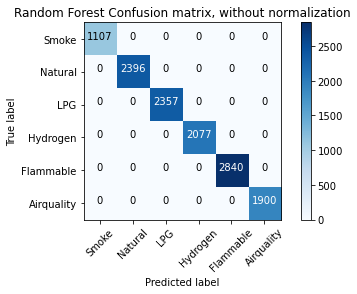

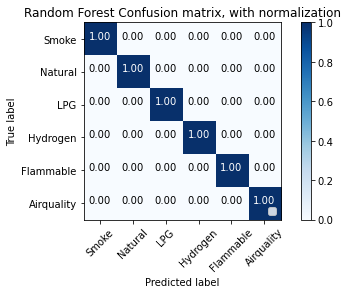

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['Smoke','Natural','LPG','Hydrogen','Flammable','Airquality']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix, without normalization')
rootdir = 'D:/RandomForest2.png'
plt.savefig(rootdir, dpi=500,bbox_inches='tight')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Random Forest Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
rootdir = 'D:/RandomForest1.png'
plt.savefig(rootdir,dpi=500,bbox_inches='tight')
plt.show()